**Exercise 5.1**

In this exercise, we will explore the "wine dataset" which is a common example
dataset used for classification. The dataset contains the results of
a chemical analysis of wines from the same region in Italy, using grapes grown
by three different cultivators. In this first exercise, we will explore this
dataset using principal component analysis.


**(a)** Begin by exploring the raw data. Here, you should choose
the method yourself. You can, for instance, look at histograms of the
different measured quantities, correlations between the quantities,
or other plots of the raw data. It can also be useful to explore
statistical properties like averages and standard deviations. The Python
code in the following cell can be used to load the data set, 
and it will print out some summaries of the raw data which you may find
helpfull for your exploration

After looking at the raw data, are there some of the variables that seem to be able to distinguish between the wines produced by the different cultivators?

In [1]:
"""Load the wine data set and print some info."""                               
from sklearn.datasets import load_wine                                          
import numpy as np                                                              
import pandas as pd                                                             
                                                                                
                                                                                
data_set = load_wine()                                                          
# Print out some information about the data set:                                
print('Variables in the data set:')                                             
for i in data_set['feature_names']:                                             
    print(i)                                                                    
print('Classes in the data set (cultivators):')                                 
for i in data_set['target_names']:                                              
    print(i)                                                                    
# Convert the data set into a pandas DataFrame:                                 
data = pd.DataFrame(data_set['data'], columns=data_set['feature_names'])        
# Print a table with a summary for each variable:                               
for variable in data.columns:                                                   
    print('\nSummary for "{}":'.format(variable))                               
    print(data[[variable]].describe())                                          
# We can also use the class information:                                        
class_data = data_set['target']                                                 
class_names = dict(enumerate(data_set['target_names']))                         
variable = 'color_intensity'                                                    
for class_id, class_name in class_names.items():                                
    print('\nInformation about "{}" for "{}"'.format(variable, class_name))        
    idx = np.where(class_data == class_id)[0]                                   
    data_class = data.loc[idx, variable]                                        
    print(data_class.describe())
    


Variables in the data set:
alcohol
malic_acid
ash
alcalinity_of_ash
magnesium
total_phenols
flavanoids
nonflavanoid_phenols
proanthocyanins
color_intensity
hue
od280/od315_of_diluted_wines
proline
Classes in the data set (cultivators):
class_0
class_1
class_2

Summary for "alcohol":
          alcohol
count  178.000000
mean    13.000618
std      0.811827
min     11.030000
25%     12.362500
50%     13.050000
75%     13.677500
max     14.830000

Summary for "malic_acid":
       malic_acid
count  178.000000
mean     2.336348
std      1.117146
min      0.740000
25%      1.602500
50%      1.865000
75%      3.082500
max      5.800000

Summary for "ash":
              ash
count  178.000000
mean     2.366517
std      0.274344
min      1.360000
25%      2.210000
50%      2.360000
75%      2.557500
max      3.230000

Summary for "alcalinity_of_ash":
       alcalinity_of_ash
count         178.000000
mean           19.494944
std             3.339564
min            10.600000
25%            17.200000

In [2]:
import matplotlib.pyplot as plt

# Some fancy plotting colors
COLORS = {                                                                      
    0: '#1b9e77',                                                               
    1: '#d95f02',                                                               
    2: '#7570b3',                                                               
} 

def explore_data(data, class_data):                                             
    """Explore raw data by box plots and histograms."""                         
    # Let us plot some histograms:                                              
    fig1, axes_grid = plt.subplots(figsize=(12, 8), nrows=3, ncols=5,           
                                   constrained_layout=True)                     
    fig1.suptitle('Histograms of variables')                                    
    axes_flat = axes_grid.flatten()                                             
    for i, variable in enumerate(data.columns):                                 
        for class_id in set(class_data):                                        
            idx = np.where(class_data == class_id)[0]                           
            data_i = data[variable].iloc[idx]                                   
            axes_flat[i].hist(                                                  
                data_i,                                                         
                density=True,                                                   
                color=COLORS[class_id],                                         
                alpha=0.8,                                                      
                edgecolor='black'                                               
            )                                                                   
        axes_flat[i].set_xlabel(variable)                                       
    for idx, color in COLORS.items():                                           
        axes_flat[-2].hist([], color=color, label='Class {}'.format(idx))          
    axes_flat[-1].axis('off')                                                   
    axes_flat[-2].axis('off')                                                   
    axes_flat[-2].legend(loc='upper center', fontsize='large')                  
    # Let us check out the averages:                                            
    fig2, axes_grid2 = plt.subplots(                                            
        figsize=(12, 8), nrows=3, ncols=5,                                      
        constrained_layout=True                                                 
    )                                                                           
    fig2.suptitle('Boxplots of variables')                                      
    axes_flat2 = axes_grid2.flatten()                                           
    for i, variable in enumerate(data.columns):                                 
        x = []                                                                  
        for class_id in set(class_data):                                        
            idx = np.where(class_data == class_id)[0]                           
            data_i = data[variable].iloc[idx]                                   
            x.append(data_i)                                                    
        axes_flat2[i].boxplot(                                                  
            x, labels=['Class {}'.format(j) for j in range(len(x))]             
        )                                                                       
        axes_flat2[i].set_xlabel(variable)                                      
    axes_flat2[-1].axis('off')                                                  
    axes_flat2[-2].axis('off')
explore_data(data, class_data) 

**Answer to 5.1(a)**: Here, we explored histograms for the different variables in 
the top figures above. None of the variables seem to separate
the data into $3$ distinct classes. However, some variables seem to
separate the data partially, for instance, the variable
flavanoids.

[Box plots](https://www.youtube.com/watch?v=Hm6Mra5XJSs)
summarize statistical data in a graphical way
and box plots for the different variables are shown in the other figures above.
This figure also shows that there is no clear distinction between the classes.
Some variables have distinct medians, but there is still some overlap within
variables. Note that the box plots also indicate that there might be some
outliers in some of the variables.

**(b)** Perform a PCA on the data set and plot the explained variance as a function
of the number of principal components. Do you need to scale your data before performing
PCA in this case (why/why not)? How many principal components are needed to explain $95$ \%
of the variance in the data? The following code cell can be used to run the PCA

In [3]:
"""Load the wine data set and run PCA."""                                       
from sklearn.datasets import load_wine                                          
from sklearn.preprocessing import scale                                         
from sklearn.decomposition import PCA                                           
import numpy as np                                                              
import pandas as pd                                                             
                                                                                
                                                                                
data_set = load_wine()                                                          
data = pd.DataFrame(data_set['data'], columns=data_set['feature_names'])        
X = data                                                                        
# Uncomment the following line to scale your data:                              
X = scale(data)                                                                
pca = PCA(random_state=0)                                                       
scores = pca.fit_transform(X)                                                   
# Print out the percentage of variance explained by each component:             
print(pca.explained_variance_ratio_)

[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


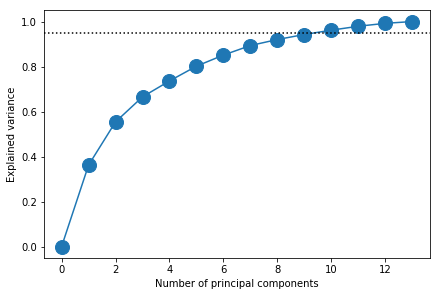

In [4]:
def plot_explained_variance(pca):                                               
    """Plot the explained variance."""                                          
    fig1, ax1 = plt.subplots(constrained_layout=True)                           
    variance = [0] + list(np.cumsum(pca.explained_variance_ratio_))             
    ax1.plot(variance, marker='o', markersize=14)                               
    ax1.set(xlabel='Number of principal components',                            
            ylabel='Explained variance')
    ax1.axhline(y=0.95, ls=':', color='black')
plot_explained_variance(pca)

**Answer to 5.1(b):** Here, we should scale the variables. This ensures that we weight the different
      variables equally when we perform PCA. The explained variance is shown
      in the figure above.       From this figure we see that we need $10$ principal components to account for
      $95$ \% of the variance.

**(c)** After selecting the number of principal components to use, rerun the PCA with
this number of components. This can be done by defining argument `n_components` to 
`PCA`, e.g.: `pca = PCA(n_components=13)`.

Obtain the scores, and make a plot of the scores for
principal component 1 (on the x-axis) and principal component 2 (on the y-axis).

Do you see any grouping(s) ("clusters") in your scores plot?
Here, you can choose to color the scores according
to the class they belong to (i.e. by using the class
data available in the data set).

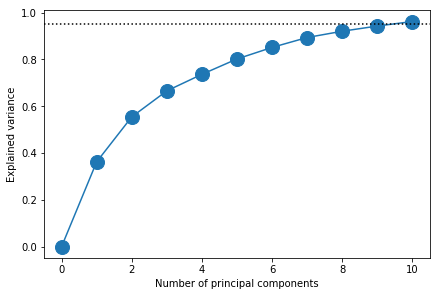

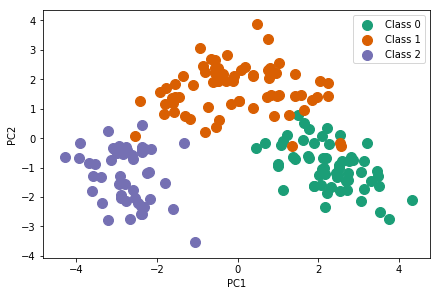

In [5]:
# Your code here
data = pd.DataFrame(data_set['data'], columns=data_set['feature_names'])                                                                                
X = scale(data)                                                                
pca = PCA(n_components=10, random_state=0)                                     
scores = pca.fit_transform(X)                                                   
# Print out the percentage of variance explained by each component:             
plot_explained_variance(pca)

fig1, ax1 = plt.subplots(constrained_layout=True)                           

for class_id in set(class_data):                                        
    idx = np.where(class_data == class_id)[0]                           
    ax1.scatter(scores[idx, 0], scores[idx, 1],       
                s=100, color=COLORS[class_id],                          
                label='Class {}'.format(class_id))                      
ax1.legend()                                                            
ax1.set(xlabel='PC{}'.format(0 + 1),                               
        ylabel='PC{}'.format(1 + 1));

**Answer to 5.1(c):** The variance obtained after running the PCA a second time is shown
in the figure above, together with the scores plot. The scores show some separation into clusters, however, the distinction is not very clear. 

**(d)** 
Explore the loadings for your PCA model by plotting the
loadings for the variables (on principal component 1 and
principal component 2). Do any of the variables seem to be correlated?


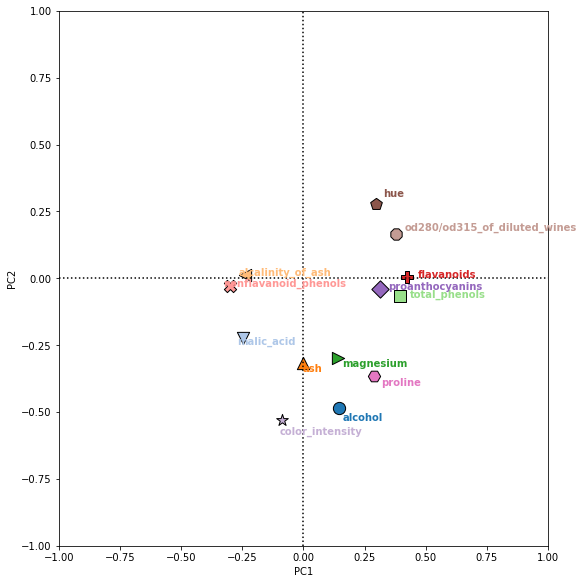

In [6]:
import matplotlib as mpl
from matplotlib.cm import tab20                                                 

MARKERS = MARKERS = [                                                                     
    'o', 'v', '^', '<', '>', 's', 'P', 'X', 'D', '*', 'p', '8', 'H'             
] 

variables = data.columns
component1 = 0
component2 = 1
load1 = pca.components_[component1, :]                                      
load2 = pca.components_[component2, :]                                      
fig1, ax1 = plt.subplots(constrained_layout=True, figsize=(8,8))                           
ax1.set_prop_cycle(mpl.cycler(color=tab20.colors))                          
ax1.axhline(y=0, ls=':', color='black')                                     
ax1.axvline(x=0, ls=':', color='black')                                     
for i, (loadx, loady, vari) in enumerate(zip(load1, load2, variables)):     
    scat = ax1.scatter(loadx, loady, s=150,                                 
                       marker=MARKERS[i], label=vari, edgecolor='black')    
    ax1.annotate(vari, (loadx*1.1, loady*1.1),                              
                 color=scat.get_facecolors()[0], weight='bold')             
ax1.set(xlabel='PC{}'.format(component1 + 1),                               
        ylabel='PC{}'.format(component2 + 1))                               
ax1.set_xlim(-1, 1)                                                         
ax1.set_ylim(-1, 1);

**Your answer to 5.1(d):** The loadings are shown in the figure above.       From this figure, we see that flavanoids, total_phenols and proanthocyanins are grouped together and correlated.

**(e)** 
Save the scores you have obtained to a new file.
We will use this information in the next part
of the exercise, where we will try to find clusters in our data.

Saving the scores can be done with `pandas` as follows:

In [7]:
"""Load the wine data set, run PCA and save scores."""
from sklearn.datasets import load_wine
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd


data_set = load_wine()
data = pd.DataFrame(data_set['data'], columns=data_set['feature_names'])
X = scale(data)
pca = PCA(n_components=10, random_state=0)
scores = pca.fit_transform(X)
# Create variable names for the principal components:
pc_name = ['PC{}'.format(i + 1) for i in range(pca.n_components_)]
# Create a DataFrame from the scores:
scores_data = pd.DataFrame(scores, columns=pc_name)
# Save the scores to a comma separated values-file:
scores_data.to_csv('scores.csv')

**Exercise 5.2**
We will continue exploring the "wine dataset". We will pretend that we do not
know that there are $3$ classes in the dataset, and we will investigate
what the `KMeans` clustering method can tell us about it. For this
exercise, it is a good idea to read through all points below before
starting, as you will find a link to a specific example you can use 
to answer most of the questions.

**(a)** Explain the steps in the `KMeans` clustering algorithm.
How can we use this algorithm without knowing how many clusters
there are in the data?

**Answer to 5.2(a):** The KMeans clustering starts with first defining the number of clusters
we are going to find. Then we find initial positions for our centroids.
This can, for instance, be
done by giving the centroids random positions. In this specific case, we
specify `init='k-means++` for question **5.2(b)** which is a bit more clever than just assigning 
random positions. In this initialization method, clusters are placed far 
away from each other. For the actual implementation please see 
[the original paper describing this initialization](http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf).

After having set the initial positions of the clusters, we do the following:
 1. For each observation (data point) we assign it to the nearest centroid.
 2. For each centroid, we calculate a new center by taking the mean of the
    locations of the observations assigned to it in the previous step.
 3. We update the locations for the centeroids according to the
    mean found in the previous step.
 4. We repeat the steps above until the locations of the cluster centers
    do not change.

If we do not know how many clusters there are, we have to try different values.
After trying different possible cluster numbers, we compare them using metrics
such as the sum of squared distances of the samples to their closest cluster
center, or the silhouette values.

**(b)**
Run `KMeans` clustering on the wine dataset. Here, you will have to
select a set of numbers of clusters to look for. (Limit yourself to
a maximum of 10 clusters) After running the clustering for your 
data, plot the sum of squared distances of samples to their closest
cluster center, as a function of the number of clusters considered. 

Explain briefly how this plot can be used to identify the "correct"
number of clusters. 

How many clusters would you say there are in the
dataset, based on this plot alone?
      
To get you started, the cell below has some Python code that can be used to run the
clustering and store the results (see also the [silhouette example](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html))

Note that the `cluster_km` object contains the following results as attributes:
 * `cluster_centers_`: Coordinates of cluster centers.
 * `labels_`: Labels of each point.
 * `inertia_`: Sum of squared distances of samples to their closest cluster center.
 * `n_iter_`: Number of iterations run.

Sum of squared distances of samples to their closest cluster center:
Clusters: 2: 1658.7588524290954
Clusters: 3: 1277.928488844642
Clusters: 4: 1181.8016436661605
Clusters: 5: 1111.05338246418
Clusters: 6: 1052.6008735015037
Clusters: 7: 995.3626024060993
Clusters: 8: 930.4659519639059
Clusters: 9: 893.112026580203
Clusters: 10: 848.9516654428104


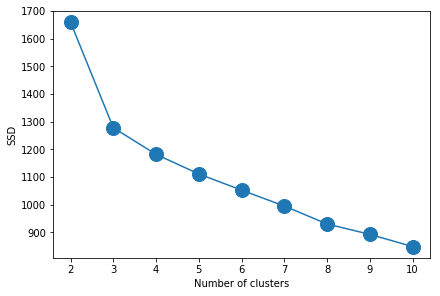

In [8]:
"""Load the wine data set and run KMeans."""                                    
from sklearn.datasets import load_wine                                          
from sklearn.preprocessing import scale                                         
from sklearn.cluster import KMeans                                              
import numpy as np                                                              
import pandas as pd                                                             
                                                                                
                                                                                
data_set = load_wine()                                                          
data = pd.DataFrame(data_set['data'], columns=data_set['feature_names'])        
X = scale(data)                                                                 
# Define a set of numbers of clusters to run KMeans for:                        
number_of_clusters = list(range(2,11))                                                     
# Set up variables for storing the results                                      
results = []  # Results for the clustering                                      
yfit = []  # Predicted clusters for data points in X                            
for i in number_of_clusters:                                                    
    cluster_km = KMeans(                                                        
        n_clusters=i,                                                           
        init='k-means++',                                                       
        random_state=0,                                                         
    )                                                                           
    y = cluster_km.fit_predict(X)                                               
    results.append(cluster_km)                                                  
    yfit.append(y)                                                              
# Print out some results:                                                       
print('Sum of squared distances of samples to their closest cluster center:')   
for i, result in zip(number_of_clusters, results):                              
    print('Clusters: {}: {}'.format(i, result.inertia_))

fig1, ax1 = plt.subplots(constrained_layout=True)                                       
ax1.plot(number_of_clusters, [i.inertia_ for i in results], marker='o', markersize=14)                   
ax1.set(xlabel='Number of clusters', ylabel='SSD');

**Answer to 5.2(b):** The sum of squared distances of samples to their closest cluster center
is plotted in the cell above. In this figure, there is no clear "elbow", however, we see that 
there is a large drop when going from $2$ to $3$ clusters, and smaller drops when increasing the number of 
clusters. We can take this as an indication of there being three clusters in the data set, however,
we should do some more analysis to see if we can verify this (see the next answer).

**(c)** 
A general method that can be used to assess the clustering, 
is the silhouette method. This method calculates a silhouette 
value for each object which is a measure of how similar the 
object is to the cluster it belongs to (cohesion) compared to
other clusters (separation). This is rather easy to calculate 
with `sklearn` as there is a method to do just so: 
[`silhouette_samples`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html) from the module `sklearn.metrics`.

Do the following:
 * For each clustering you have considered, i.e. for each number of clusters you tried,
   calculate the silhouette values.
 * Plot the average silhouette value as a function of the number of clusters considered.
 * For each clustering, plot the silhouette values grouped into clusters. Say, if you,
   for instance, considered $4$ clusters in one of your clusterings, plot the silhouette
   values for each of these $4$ clusters. An example of how to do this is available on
   the website of [`sklearn`](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).
   
Using these results (average silhouette values) and the plots of silhouette values, what
is the best number of clusters to use? How does this compare with what we already know --
that the samples come from $3$ different cultivators?


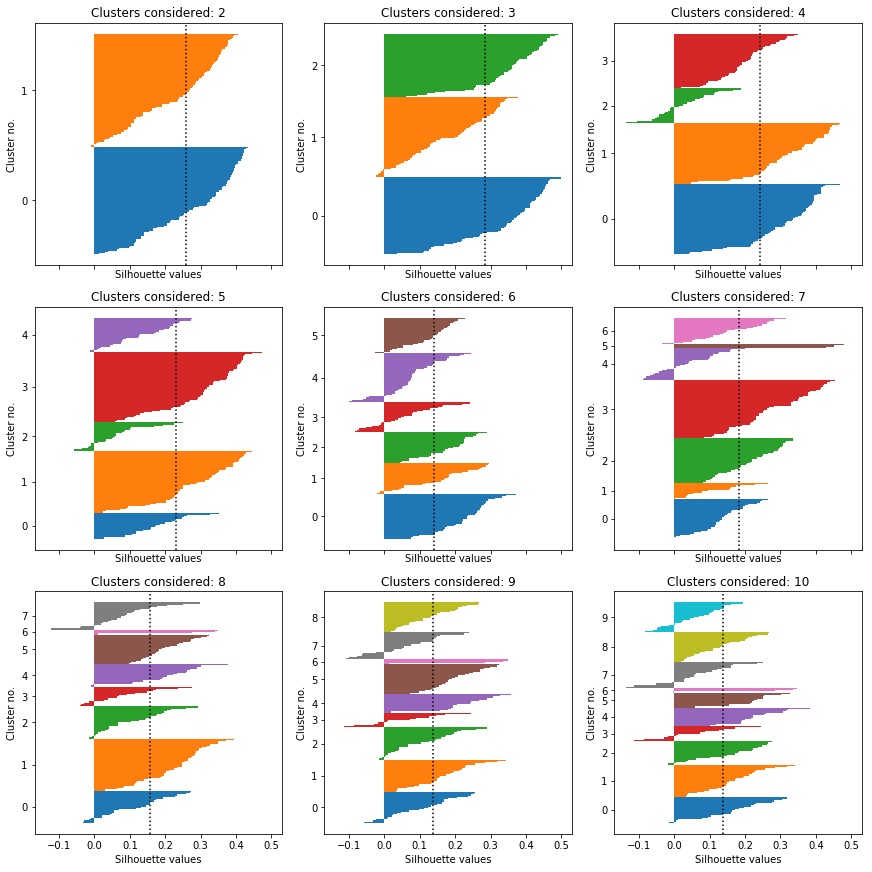

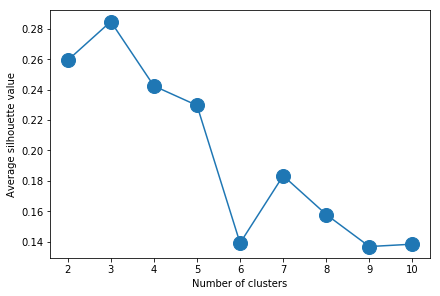

In [9]:
from sklearn.metrics import silhouette_samples
def plot_silhouette(X, y, ax1=None):                                            
    """Plot silhouettes for a given clustering."""                              
    silh = silhouette_samples(X, y, metric='euclidean')                         
    avg = silh.mean()                                                           
    fig1 = None                                                                 
    if ax1 is None:                                                             
        fig1, ax1 = plt.subplots(constrained_layout=True)                       
    cluster_labels = np.unique(y)                                               
    pos0 = 0                                                                    
    yticks = []                                                                 
    ytick_pos = []                                                              
    for i in cluster_labels:                                                    
        values = sorted(silh[y == i])                                           
        pos = np.arange(len(values)) + pos0                                     
        ytick_pos.append(pos.mean())                                            
        yticks.append(i)                                                        
        pos0 = max(pos) + 1                                                     
        ax1.barh(pos, values, edgecolor='none', height=1)                       
    ax1.axvline(x=avg, ls=':', color='black')                                   
    ax1.set_yticks(ytick_pos)                                                   
    ax1.set_yticklabels(yticks)                                                 
    ax1.set_xlabel('Silhouette values')                                         
    ax1.set_ylabel('Cluster no.')                                               
    return fig1, ax1, avg

averages = []                                                               
fig2, axes2 = plt.subplots(                                                 
    nrows=3, ncols=3, constrained_layout=True, sharex=True,                 
    figsize=(12, 12)                                                         
)

axes_flat = axes2.flatten()                                              
for i, y, axi in zip(number_of_clusters, yfit, axes_flat):                              
    _, _, avg = plot_silhouette(X, y, ax1=axi)                    
    averages.append((i, avg))                                               
    axi.set_title('Clusters considered: {}'.format(i))
    
# Make average value plot
fig1, ax1 = plt.subplots(constrained_layout=True)                                       
averages= np.array(averages)
ax1.plot(averages[:,0], averages[:,1], marker='o', markersize=14)                   
ax1.set(xlabel='Number of clusters', ylabel='Average silhouette value');

**Answer to 5.2(c):** The silhouettes and the average values are plotted above. 
From these plots we see that using $2$ or $3$ clusters give more even clusterings
than the other cluster numbers we tried. The average silhouette value is largest
when using three clusters, and we find that there are three clusters.

We can also make some plots similar to the ones we made when exploring the
raw data. A new box plot for the discovered clusters are shown
below. Comparing this figure with the figure for question **5.1(a)**
we see similarities (note that the cluster numbering differs), but here, we
have discovered these clusters. We can, for instance, say that it looks like the color intensity of the different wines is something that can be used to distinguish between them.

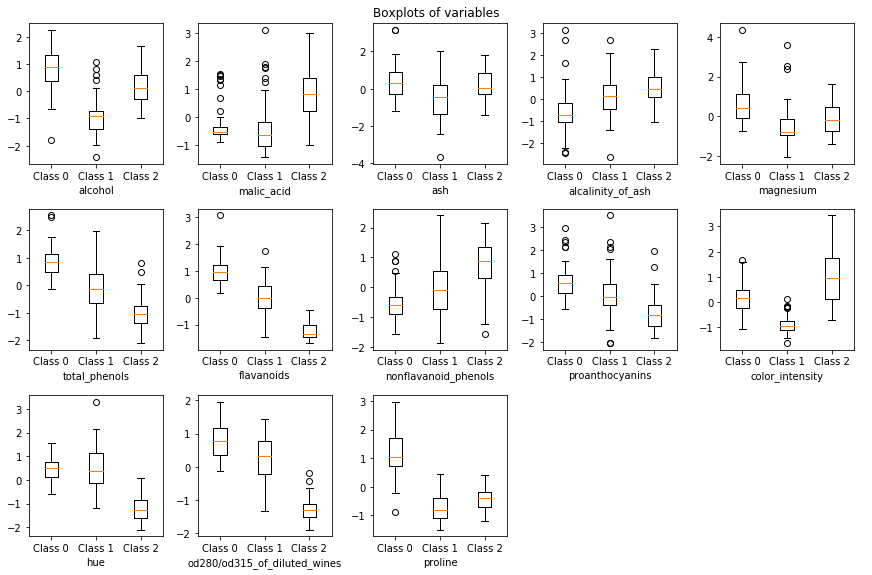

In [10]:
def box_plot(data, class_data, variables, nrows=3, ncols=5):                                      
    """Make some box plots of the variables."""                                 
    fig1, axes_grid = plt.subplots(                                             
        figsize=(12, 8), nrows=nrows, ncols=ncols,                                      
        constrained_layout=True                                                 
    )                                                                           
    fig1.suptitle('Boxplots of variables')                                      
    axes_flat = axes_grid.flatten()                                             
    for i, variable in enumerate(variables):                                    
        x = []                                                                  
        for class_id in sorted(np.unique(class_data)):                          
            idx = np.where(class_data == class_id)[0]                           
            x.append(data[idx, i])                                              
        axes_flat[i].boxplot(                                                   
            x, labels=['Class {}'.format(j) for j in range(len(x))]             
        )                                                                       
        axes_flat[i].set_xlabel(variable)                                       
    if len(axes_flat) > 2:
        axes_flat[-1].axis('off')                                                   
        axes_flat[-2].axis('off')  

y = yfit[1]
box_plot(X, y, data.columns);

**(d)** 
Rerun your analysis on the scores you stored in the last point of the PCA part.
But use only the scores from principal components $1$ and $2$.
Do the results from this analysis differ from the cluster analysis on the full data set?

**Note:** As we only consider two of the principal components here, we have 2D-data. This
means that we can plot the clusters more easily. If you are curious, plot the
scores for principal components $1$ and $2$ and color the points according to the
clustering results you have obtained. Here, you can also show the centers of the
clusters by using the `cluster_centers_` attribute of the `KMeans` object you have
used. This part of the exercise also shows that PCA can be used as an initial 
method to reduce the dimensionality of the original problem. We have here 
combined PCA and KMeans to solve a clustering problem.

Sum of squared distances of samples to their closest cluster center:
Clusters: 2: 628.7883507554772
Clusters: 3: 259.80772204980263
Clusters: 4: 193.1470309154343
Clusters: 5: 155.1897928555473
Clusters: 6: 122.83568482042284
Clusters: 7: 99.23553010259224
Clusters: 8: 89.23218732065132
Clusters: 9: 81.6204135613896
Clusters: 10: 72.38510229938977


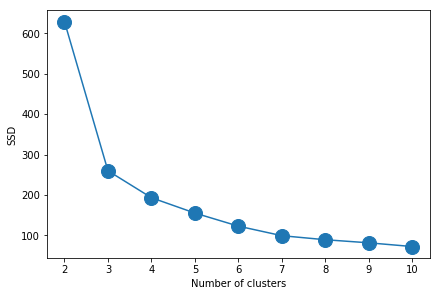

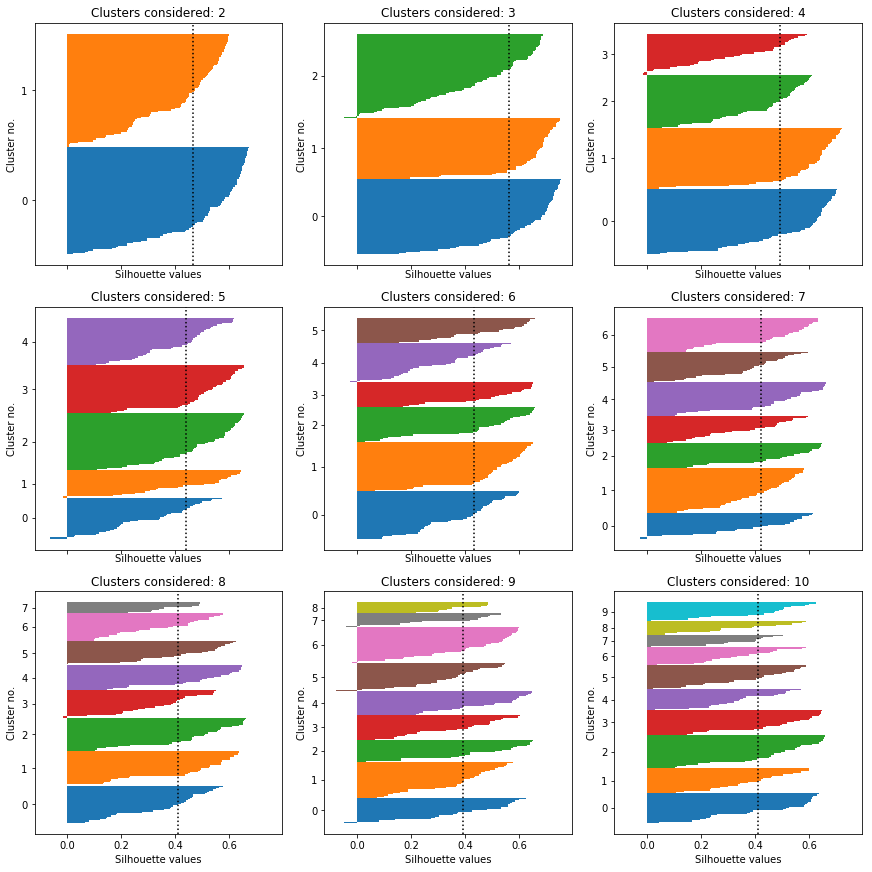

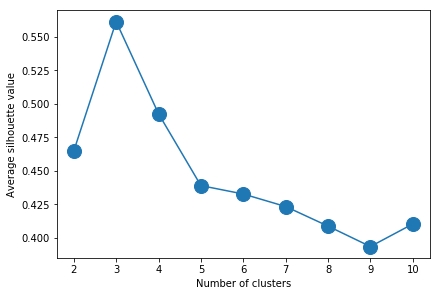

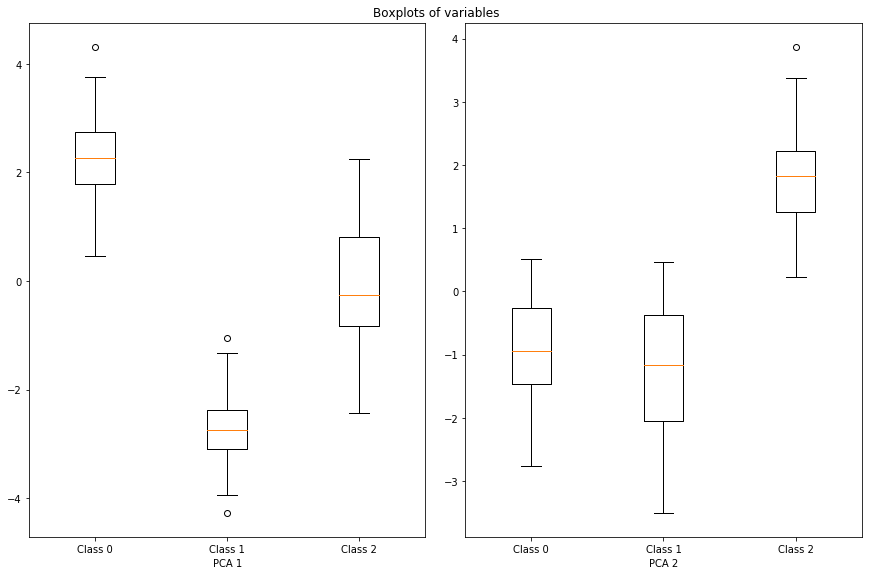

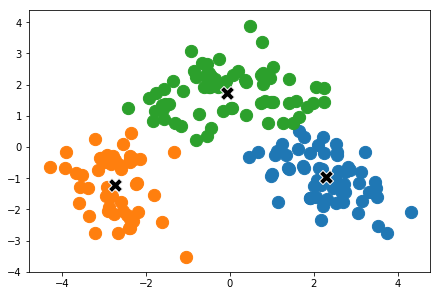

In [11]:
data_raw = pd.read_csv('scores.csv')                                        
X = data_raw[['PC1', 'PC2']]                                             

# Define a set of numbers of clusters to run KMeans for:                        
number_of_clusters = list(range(2,11))                                                     
# Set up variables for storing the results                                      
results = []  # Results for the clustering                                      
yfit = []  # Predicted clusters for data points in X                            
for i in number_of_clusters:                                                    
    cluster_km = KMeans(                                                        
        n_clusters=i,                                                           
        init='k-means++',                                                       
        random_state=0,                                                         
    )                                                                           
    y = cluster_km.fit_predict(X)                                               
    results.append(cluster_km)                                                  
    yfit.append(y)                                                              
# Print out some results:                                                       
print('Sum of squared distances of samples to their closest cluster center:')   
for i, result in zip(number_of_clusters, results):                              
    print('Clusters: {}: {}'.format(i, result.inertia_))

fig1, ax1 = plt.subplots(constrained_layout=True)                                       
ax1.plot(number_of_clusters, [i.inertia_ for i in results], marker='o', markersize=14)                   
ax1.set(xlabel='Number of clusters', ylabel='SSD');

averages = []                                                               
fig2, axes2 = plt.subplots(                                                 
    nrows=3, ncols=3, constrained_layout=True, sharex=True,                 
    figsize=(12, 12)                                                         
)

axes_flat = axes2.flatten()                                              
for i, y, axi in zip(number_of_clusters, yfit, axes_flat):                              
    _, _, avg = plot_silhouette(X, y, ax1=axi)                    
    averages.append((i, avg))                                               
    axi.set_title('Clusters considered: {}'.format(i))
    
# Make average value plot
fig1, ax1 = plt.subplots(constrained_layout=True)                                       
averages = np.array(averages)
ax1.plot(averages[:,0], averages[:,1], marker='o', markersize=14)                   
ax1.set(xlabel='Number of clusters', ylabel='Average silhouette value')

y = yfit[1]
box_plot(X.to_numpy(), y, ['PCA 1', 'PCA 2'], nrows=1, ncols=2);

# Plot the clustering for three clusters:                                   
fig4, ax4 = plt.subplots(constrained_layout=True)                           
clu = results[1]                                                      
for i in np.unique(y):                                                      
    cluster = data_raw[y == i]                                                  
    ax4.scatter(cluster['PC1'], cluster['PC2'], s=150)                      
# Add cluster centers:                                                      
for row in clu.cluster_centers_:                                            
    ax4.scatter(row[0], row[1], s=200, marker='X',                          
                color='black', edgecolor='white')   

**Answer to 5.2(d):** When repeating the clustering using the scores from the previous PCA,
we get the results given above. In this case, we see that the clustering with three clusters stands out more
      compared to the situation where we considered all original variables. Here, we
      again conclude that there are three clusters in the data set.


**Exercise 5.3: LDA Example**

Both PCA and KMeans are examples of unsupervised methods 
-- we did not use the class information available to us to
find clusters in our data. [Linear discriminant analysis](https://en.wikipedia.org/wiki/Linear_discriminant_analysis)
on the other hand, is a supervised method that uses the class
information for *classification*. In your own words, how would you
describe the difference between *classification* and
*clustering*?

LDA is similar to PCA, but rather than looking for latent variables that maximize
the covariance in our data, we rather look for latent variables that maximize the 
*class separation*.
Below, you will find a small script that will run LDA on the
wine data set. Run this script and observe the results.

Note here the difference when we train the LDA
model: `X_trans = lda.fit_transform(X, y)`.
We are supplying the "y" values (i.e. the classes) which is what we expect
for a supervised method.

For the curious student: Apply LDA to the 2D-example dataset from exercise 4,
where we investigated classification by PCA. Does this classification differ from
the simple rule we found there?

Number of classes: 3


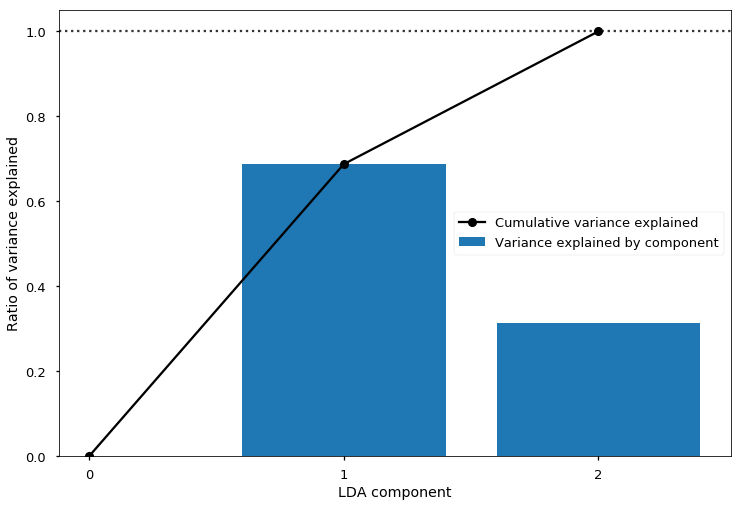

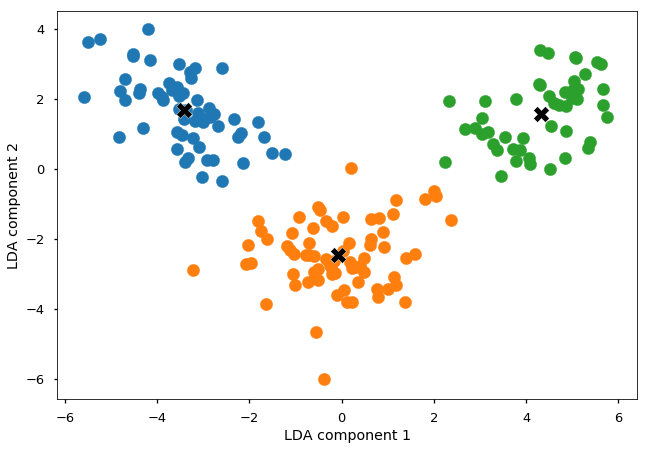

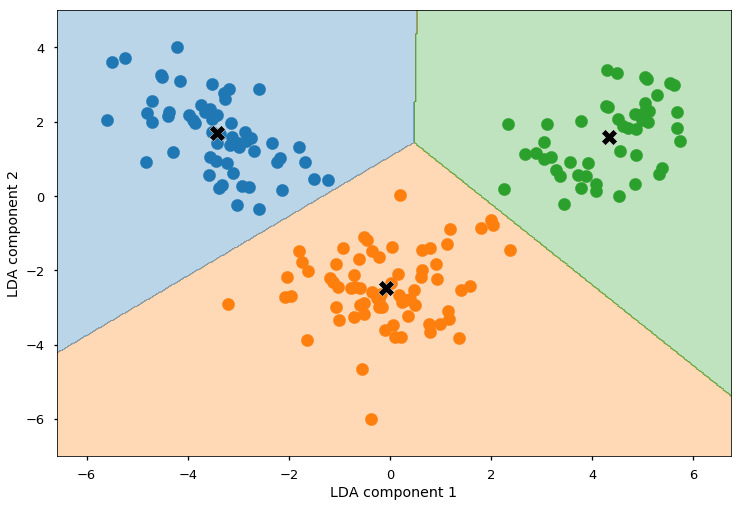

In [12]:
"""Load the wine data set and run LDA."""                                       
from matplotlib import pyplot as plt                                            
from matplotlib.colors import ListedColormap                                    
from matplotlib.cm import tab10                                                 
from sklearn.datasets import load_wine                                          
from sklearn.preprocessing import scale                                         
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis            
import numpy as np                                                              
import pandas as pd                                                             
plt.style.use('seaborn-talk')                                                   
                                                                                
                                                                                
data_set = load_wine()                                                          
data = pd.DataFrame(data_set['data'], columns=data_set['feature_names'])        
X = scale(data)                                                                 
y = data_set['target']  # load the class information                            
# Run LDA:                                                                      
lda = LinearDiscriminantAnalysis()                                              
X_trans = lda.fit_transform(X, y)                                               
print('Number of classes:', len(lda.classes_))                                  
# Predict classes for our original points:                                      
y_hat = lda.predict(X)                                                          
                                                                                
# Plot the explained variance:                                                  
fig1, ax1 = plt.subplots()                                                      
comp = list(range(1, len(lda.explained_variance_ratio_) + 1))                   
ax1.bar(comp, lda.explained_variance_ratio_,                                    
        label='Variance explained by component')                                
ax1.plot(                                                                       
    [0] + comp,                                                                 
    [0] + list(np.cumsum(lda.explained_variance_ratio_)),                       
    color='black',                                                              
    marker='o',                                                                 
    label='Cumulative variance explained')                                      
ax1.set_xticks([0] + comp)                                                      
ax1.set(xlabel='LDA component', ylabel='Ratio of variance explained')           
ax1.legend()                                                                    
ax1.axhline(y=1, ls=':', color='black', alpha=0.8)                              
fig1.tight_layout()                                                             
                                                                                
# Plot the transformed X, this is similar to the scores found in PCA:           
fig2, ax2 = plt.subplots()                                                      
for i in np.unique(y_hat):                                                      
    ax2.scatter(X_trans[y_hat == i, 0], X_trans[y_hat == i, 1],                 
                color=tab10.colors[i], s=150)                                   
ax2.set(xlabel='LDA component 1', ylabel='LDA component 2')                     
# Plot the centers of the clusters found:                                       
for center in lda.transform(lda.means_):                                        
    ax2.scatter(center[0], center[1], s=250, color='black',                     
                marker='X', edgecolor='white')                                  
                                                                                
# Now, in order to plot the regions, we would like to have 2D data.             
# The classification we have right now, expects 13 variables to                 
# classify samples. We therefore run a second LDA on the LDA we                 
# already have performed:                                                       
lda2 = LinearDiscriminantAnalysis()                                             
X_trans2 = lda2.fit_transform(X_trans, y_hat)                                   
y_hat2 = lda2.predict(X_trans)                                                  
# Show the regions:                                                             
fig3, ax3 = plt.subplots()                                                      
X_set = X_trans
X1, X2 = np.meshgrid(                                                           
    np.linspace(X_trans[:, 0].min() - 1, X_trans[:, 0].max() + 1, 500),         
    np.linspace(X_trans[:, 1].min() - 1, X_trans[:, 1].max() + 1, 500)          
)                                                                               
Z = lda2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)        
plt.contourf(X1, X2, Z, alpha = 0.3,                                            
             cmap=ListedColormap(tab10.colors[:3]))                             
# Add the original samples:                                                     
for i in np.unique(y_hat2):                                                     
    ax3.scatter(X_trans2[y_hat2 == i, 0], X_trans2[y_hat2 == i, 1],             
                color=tab10.colors[i], s=150)                                   
ax3.set(xlabel='LDA component 1', ylabel='LDA component 2')                     
# Plot the centers of the clusters found:                                       
for center in lda2.transform(lda2.means_):                                      
    ax3.scatter(center[0], center[1], s=250, color='black',                     
                marker='X', edgecolor='white')                                  
fig3.tight_layout()

**Answer 5.3:** Above you will find the results from the LDA example. Comparing with
the results from the clustering, we see that the classes are better separated and that we
can obtain regions defining the different classes.

Below, you will find code for running LDA on the data from exercise 4. We see here that
the simple rule we found in that exercise is similar to the results from running
LDA: $y = 0.89 \times x + 0.01$

Number of classes: 2
Boundary: y = 0.89 * x + 0.01


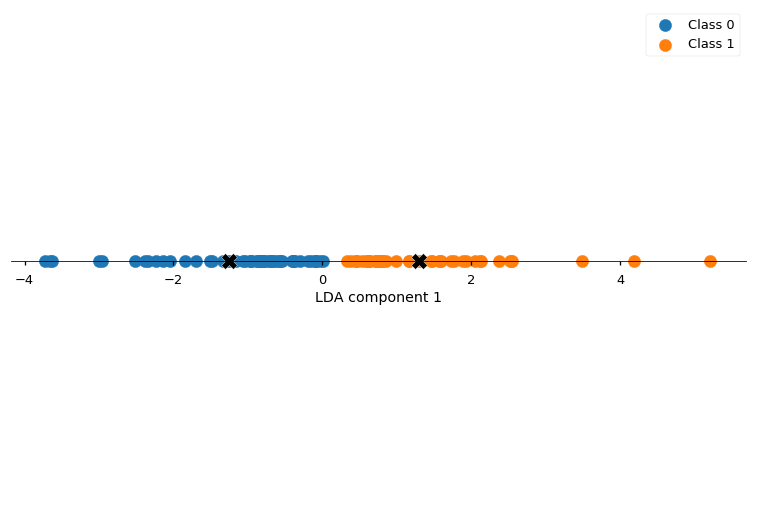

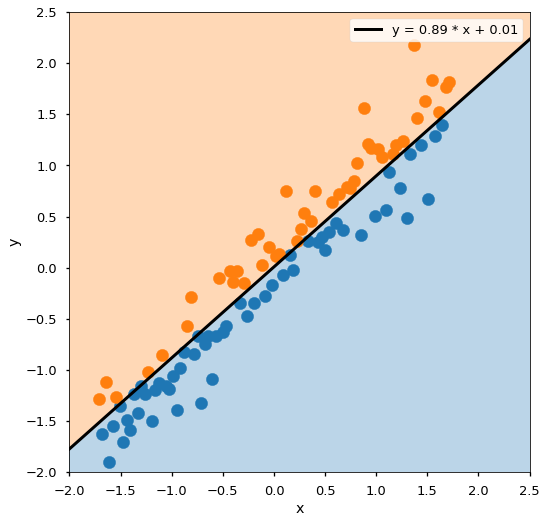

In [13]:
"""Load the data for exercise 4 and run LDA."""
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.cm import tab10
from sklearn.preprocessing import scale
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
plt.style.use('seaborn-talk')

raw_data = pd.read_csv('Data/data_exercise4.txt', delim_whitespace=True)
variables = ['x', 'y']
X = scale(raw_data[variables])
# Transform the class information to numbers:
encoder = LabelEncoder()
encoder.fit(raw_data['class'])
y = encoder.transform(raw_data['class'])
# Run LDA:
lda = LinearDiscriminantAnalysis()
X_trans = lda.fit_transform(X, y)
print('Number of classes:', len(lda.classes_))
# Predict classes for our original points:
y_hat = lda.predict(X)

# Plot the transformed X:
fig1, ax1 = plt.subplots(constrained_layout=True)
for i in np.unique(y_hat):
    x = X_trans[y_hat == i]
    ax1.scatter(x, np.zeros_like(x), color=tab10.colors[i], s=150,
                label='Class {}'.format(i))
ax1.set(xlabel='LDA component 1')
# Plot the centers of the clusters:
for center in lda.transform(lda.means_):
    ax1.scatter(center[0], 0, s=250, color='black',
                marker='X', edgecolor='white')
ax1.spines['bottom'].set_position('zero')
ax1.get_yaxis().set_visible(False)
for spine in ('left', 'top', 'right'):
    ax1.spines[spine].set_visible(False)
ax1.legend()

# Show the regions:
# Here, we can find the actual line: y = a*x + b
a = -lda.coef_[0][0] / lda.coef_[0][1]
b = -lda.intercept_[0] / lda.coef_[0][1]
boundary = 'y = {:.2f} * x + {:.2f}'.format(a, b)
print('Boundary:', boundary)
fig2, ax2 = plt.subplots(constrained_layout=True)
ax2.set_aspect('equal')
X1, X2 = np.meshgrid(np.linspace(-2, 2.5, 500), np.linspace(-2, 2.5, 500))
Z = lda.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
ax2.contourf(X1, X2, Z, alpha=0.3, cmap=ListedColormap(tab10.colors[:2]))
# Add the original samples:
for i in np.unique(y_hat):
    idx = np.where(y_hat == i)[0]
    ax2.scatter(X[idx, 0], X[idx, 1], color=tab10.colors[i], s=150)
# Let us also plot the boundary line:
xb = np.linspace(-2, 2.5, 2)
yb = a * xb + b
ax2.plot(xb, yb, color='black', lw=3, label=boundary)
ax2.set(xlabel='x', ylabel='y')
ax2.legend()
plt.show()